# Price Mechanism EDA
This project aims to investigate the relationship between various factors and price.

## Packages and Importing Data

In [1]:
# Packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
data_clean = pd.read_csv("./Data/Udemy_Clean.csv", index_col=0)

# Transform Discounted_Price as a binary variable (whether it has discount or not) which would make more sense
data_clean["Discounted_d"] = data_clean["Price"] != data_clean["Discounted_Price"]

# Inspect data
data_clean.head()

,Title,Overall_Rating,Best_Rating,Worst_Rating,No_of_Ratings,Category,Subcategory,Topic,Instructor,Language,SkillsFuture,No_of_Practice_Test,No_of_Articles,No_of_Coding_Exercises,Video_Duration_Hr,No_of_Additional_Resources,Bestseller,Price,Discounted_Price,Discounted_d
0,Complete Hypnotherapy & Hypnosis Certification...,4.7,5,0.5,3524,Lifestyle,Esoteric Practices,Hypnotherapy,Dr Karen E Wells,English,False,0,4,0,3.000000,0,Yes,104.98,26.0,True
1,Pinterest Marketing for Wedding Professionals ...,5.0,5,0.5,1,Marketing,Social Media Marketing,Pinterest Marketing,Staci Nichols,English,False,0,0,0,0.600000,2,No,29.98,22.0,True
2,Master the Telephone Sales- Cold calling Secrets,4.5,5,0.5,3,Marketing,Product Marketing,Marketing Strategy,Sanjay Bhasin,English,False,0,0,0,0.733333,0,No,29.98,22.0,True
3,5 Practical Management concepts you MUST know,5.0,5,0.5,2,Personal Development,Leadership,Management Skills,Vasudev Murthy,English,False,0,0,0,2.000000,0,No,49.98,22.0,True
4,Fermented Foods Mastery,4.5,5,0.5,187,Health & Fitness,Nutrition,Fermented Foods,Kale Brock,English,False,0,3,0,1.500000,12,No,68.98,24.0,True


## Exploratory Data Analysis
This section is used to investigate the relationship of other variables with respect to the target variable, "Price"

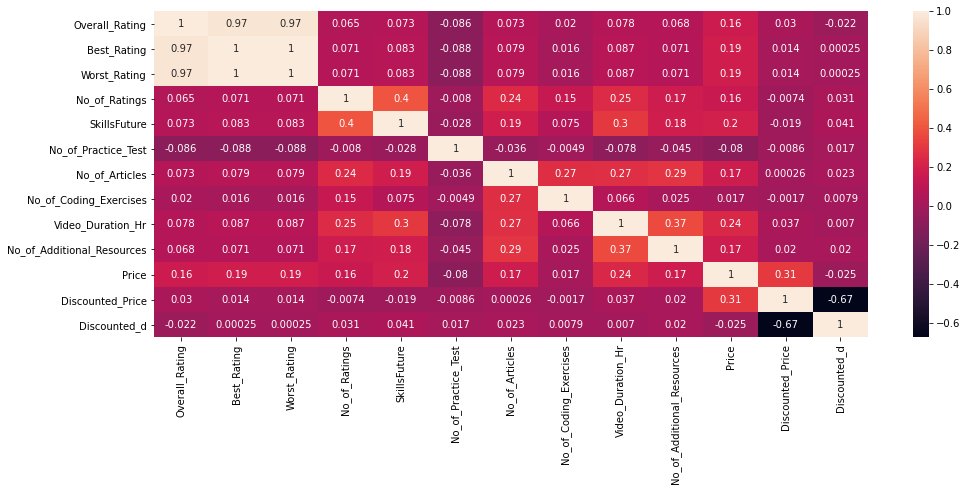

In [3]:
# Create checkpoint
data_eda = data_clean.copy()

# Correlation for numeric variables
plt.figure(figsize=(16,6))
sns.heatmap(data_eda.corr(), annot=True)
plt.show()

The numeric variables do not appear to have a very strong correlation with price. 
- **Highest correlation**: Discounted_Price (0.31)
    - This would make sense because of values that are repeated if discounts are not given. 
    - Furthermore, we would not be using this variable for our analysis but instead we will be using Discounted_d. 
- **Second highest correlation**: Video_Duration_Hr (0.24)
    - This is rational as longer video duration can translate to more content, and thus a higher price. 
- **Lowest correlation**: No_of_Practice_Test (-0.08). 
    - At first glance, this is surprising as I would expect that more practice tests would mean more course materials provided, hence a higher price. But perhaps this is not how Udemy would calculate the prices. 
    - Another plausible explanation would be that practice tests are commonly provided across all courses which doesn't make it a defining factor.

### (1) Overall_Rating VS Price

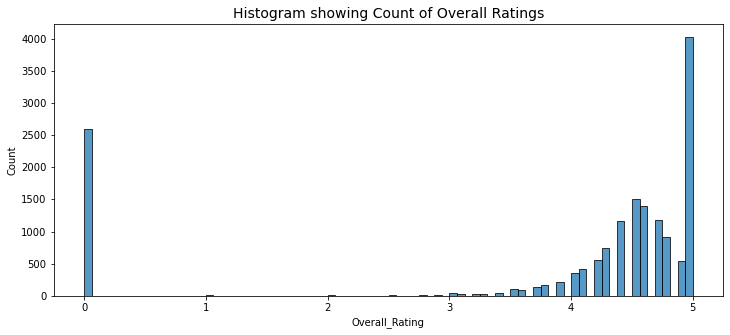

In [4]:
# Histogram of overall rating count
plt.figure(figsize=(12,5))
sns.histplot(x="Overall_Rating", data=data_eda)
plt.title("Histogram showing Count of Overall Ratings", fontsize=14)
plt.show()

This is a trimodal histogram, with three mounds, and it appears to be left skewed. From the histogram above, we can see that there are quite a few courses that are rated 0. This could be due to a lack of ratings or perhaps the course was not very satisfactory. However, apart from that there seems to be a greater number of courses with higher ratings. 

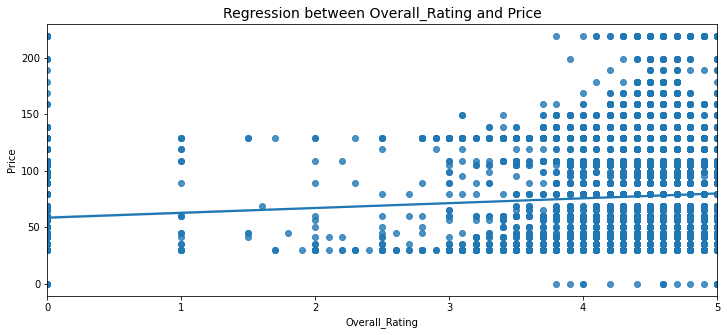

In [5]:
# Scatterplot with regression model fit
plt.figure(figsize=(12,5))
sns.regplot(x="Overall_Rating", y="Price", data=data_eda)
plt.title("Regression between Overall_Rating and Price", fontsize=14)
plt.show()

Based on the linear regression model fitted, the regression line shows that there is a very weak positive linear relationship beteween Overall_Rating and Price. As the rating for a course increases, the price would increase as well. 

From the scatter plot, the pricing of courses with ratings that are 0 seem to have no observable pattern. It is reasonable since without a rating given, it would be hard to use that as a factor to determine the price, hence in this case, other factors will determine the price. 

Additionally, as the overall ratings increase from 1 to 3, the price range of courses generally are the same. But as the overall ratings further increase beyond 3, we can see that the price range is much larger. This means that courses that attain higher overall ratings could also be the ones that are more highly priced. 

An interesting observation would be that there are a few free courses (price is 0), which are highly rated (3.5 and above). This shows that based on the samples taken, although these courses are free, they have been regarded as relatively good. 

### (2) Best Rating VS Price

In [6]:
# Counts of data
data_eda["Best_Rating"].value_counts()

5    13828
0     2601
Name: Best_Rating, dtype: int64

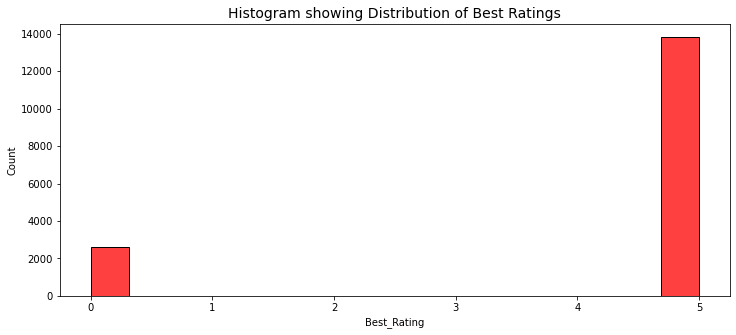

In [7]:
# Histogram to show distribution
plt.figure(figsize=(12,5))
sns.histplot(x="Best_Rating", data=data_eda, color="red")
plt.title("Histogram showing Distribution of Best Ratings", fontsize=14)
plt.show()

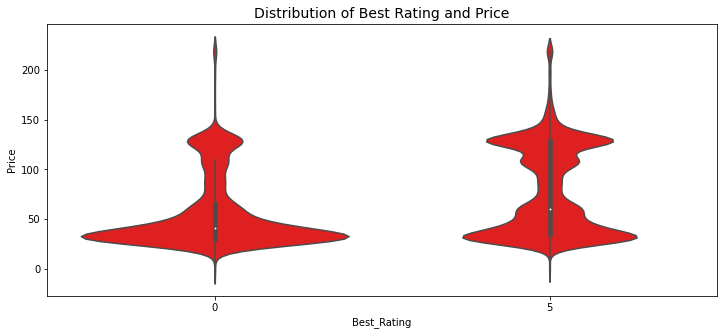

In [8]:
# Scatterplot with regression model fit
plt.figure(figsize=(12,5))
sns.violinplot(x="Best_Rating", y="Price", data=data_eda, color="red")
plt.title("Distribution of Best Rating and Price", fontsize=14)
plt.show()

This shows us that there are only 2 values for best rating. As the highest rating that one can give is 5, it is expected that the highest possible rating that a course can get is 5. For those that have ratings 0, this could be due to the fact that they have yet to be rated. However, this might not be very useful in determining the price as this becomes a weak defining factor for courses. 

As seen from the scatterplot above, courses that are rating both 0 and 5 seem to have the similar spread of prices. Although there is a slight difference, where those that are rated 0 seem to be more clustered towards lower prices while those that are rated 5 are more widely spread out. 

### (3) Worst_Rating VS Price

In [9]:
# Counts of data
data_eda["Worst_Rating"].value_counts()

0.5    13828
0.0     2601
Name: Worst_Rating, dtype: int64

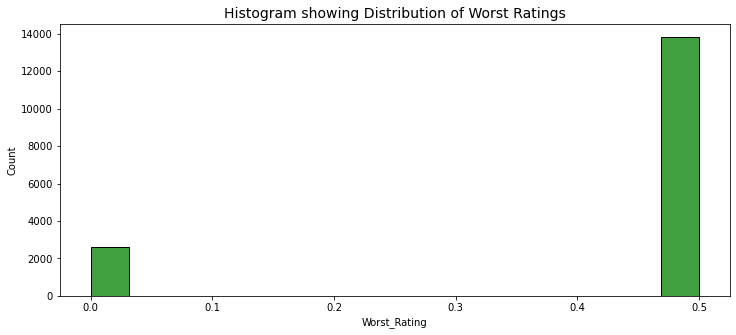

In [10]:
# Histogram to show distribution
plt.figure(figsize=(12,5))
sns.histplot(x="Worst_Rating", data=data_eda, color="green")
plt.title("Histogram showing Distribution of Worst Ratings", fontsize=14)
plt.show()

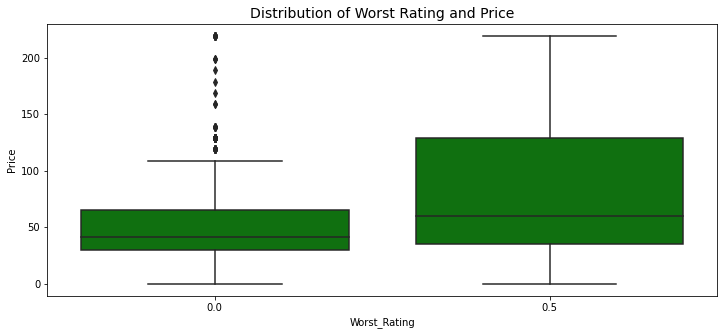

In [11]:
# Scatterplot with regression model fit
plt.figure(figsize=(12,5))
sns.boxplot(x="Worst_Rating", y="Price", data=data_eda, color="green")
plt.title("Distribution of Worst Rating and Price", fontsize=14)
plt.show()

The worst ratings given are either 0 or 0.5. 

From the boxplots above, we can see that the distribution of courses with worst ratings of 0 are generally clustered towards lower prices as well. While those that are have the worst ratings of 0.5 are more spread out. 

There seems to be quite a few outliers for those rated 0. This could be that they have yet to be rated and hence, the prices are unaffected by these ratings and thus still priced quite highly. 

### (4) No_of_Ratings VS Price

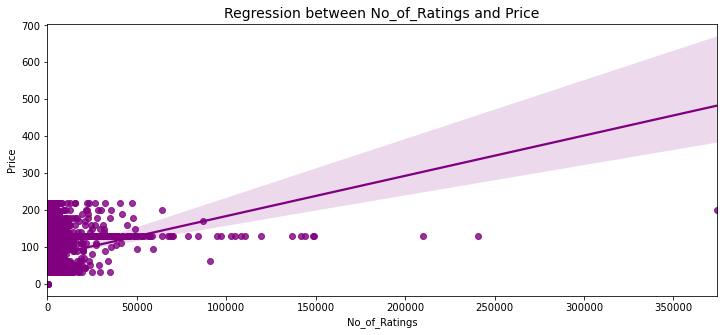

In [12]:
# Scatterplot with regression model fit
plt.figure(figsize=(12,5))
sns.regplot(x="No_of_Ratings", y="Price", data=data_eda, color="purple")
plt.title("Regression between No_of_Ratings and Price", fontsize=14)
plt.show()

From the linear regression line fitted, there seems to be a positive linear relationship. As the number of ratings increases, the price increases as well. This could be because higher number of ratings means that there are more subscribers which lead to confidence in the course, and thus higher pricing. But this means that there is a confounder here which is the number of subscribers to the course. 

However, majority of the data is clustered at the left, which means the data is right-skewed. Hence, majority of the courses do not have that many ratings as compared to some of the more frequently rated courses. These points may be outliers which will handled later on during the model. 

### (5) Category VS Price

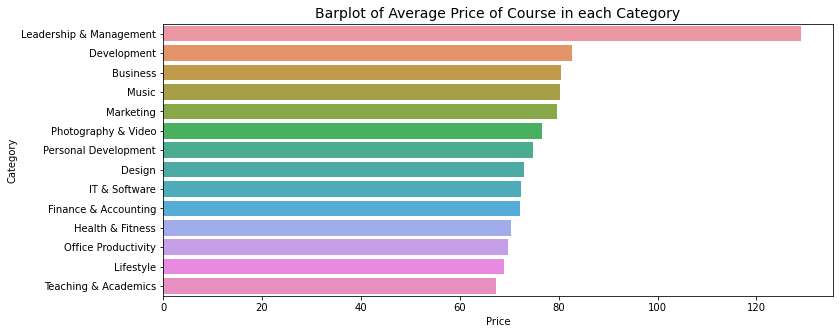

In [34]:
# Calculating mean prices of each category
meanPrice_category = pd.DataFrame(data_eda.groupby("Category").mean())
meanPrice_category["Category"] = meanPrice_category.index
meanPrice_category.sort_values(by="Price", inplace=True, ascending=False)
# Bar Plot of mean prices of each category
plt.figure(figsize=(12,5))
sns.barplot(data=meanPrice_category, x="Price", y="Category", orient="h")
plt.title("Barplot of Average Price of Course in each Category", fontsize = 14)
plt.show()

The top 3 courses with the highest average course price are 
1. Leadership & Management
2. Development
3. Business

Majority of the courses have similar mean course prices, with the exception of Leadership & Management. This could possibly be because leadership & management is a highly sought after skill that is required among all industries. Another cause could be due to a third confounding factor. For instance, it is likely that the instructors for these courses would be leaders of companies. Their position and title will increase the prestiege and boost the confidence of users in the content of the course which can bring about a higher course price. 

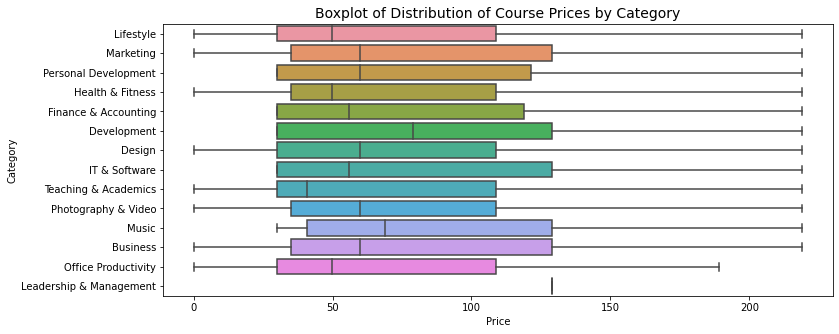

In [42]:
# Spread of category
plt.figure(figsize=(12,5))
sns.boxplot(x="Price", y="Category", data=data_eda, orient="h")
plt.title("Boxplot of Distribution of Course Prices by Category", fontsize=14)
plt.show()

In [40]:
len(data_eda[data_eda["Category"] == "Leadership & Management"])

1

From this plot, we realise that the reason why "Leadership & Management" has the highest average course price is because there is only one course from that category in dataframe. This could be due to some manual error in randomization of course categories during data collection which led to sampling bias. 

Of all the categories, Office Productivity has the lowest maximum price. On the other hand, Personal Development, Finance & Accounting, Development, IT & Software, and Music have the highest minimum prices. Generally the spread of the prices in the Interquartile Range (IQR) are similar as seen from the overlapping boxes. Additionally, all of the category prices seem to be skewed right which shows that majority of courses are not prices as high as the maximum price because they try to keep it affordable. 

### (6) Subcategory VS Price

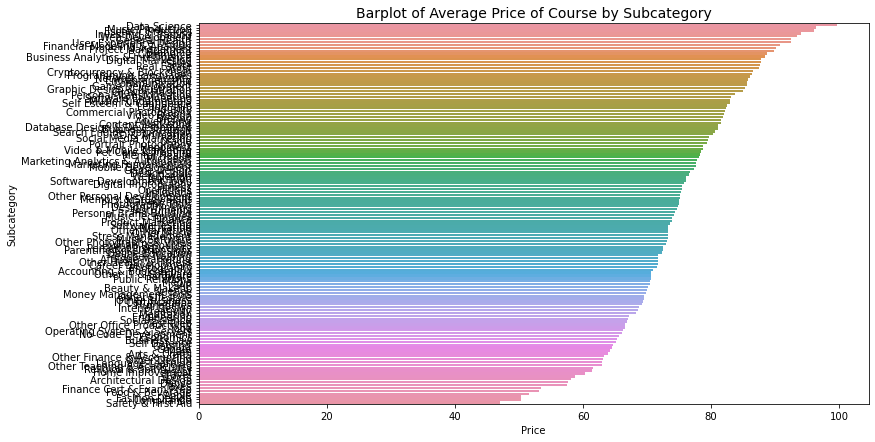

In [48]:
# Calculating mean prices of each category
meanPrice_subcategory = pd.DataFrame(data_eda.groupby("Subcategory").mean())
meanPrice_subcategory["Subcategory"] = meanPrice_subcategory.index
meanPrice_subcategory.sort_values(by="Price", inplace=True, ascending=False)

# Bar Plot of mean prices of each category
plt.figure(figsize=(12,7))
sns.barplot(data=meanPrice_subcategory, x="Price", y="Subcategory", orient="h")
plt.title("Barplot of Average Price of Course by Subcategory", fontsize = 14)
plt.show()

As there are way too many subcategories, we will look at the highest 10 and lowest 10 subcategories by prices separately. 

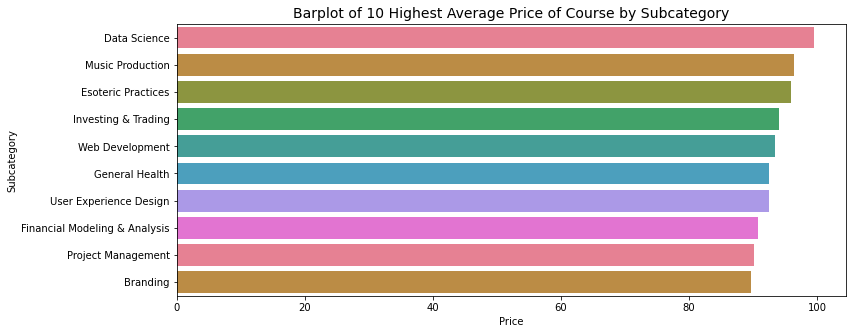

In [52]:
# Selecting highest 10 courses
highest_meanPrice_subcategory = meanPrice_subcategory[0:10]

# Bar Plot of 10 highest prices of each category
plt.figure(figsize=(12,5))
palette = sns.color_palette("husl", 8)
sns.barplot(data=highest_meanPrice_subcategory, x="Price", y="Subcategory", orient="h", palette=palette)
plt.title("Barplot of 10 Highest Average Price of Course by Subcategory", fontsize = 14)
plt.show()

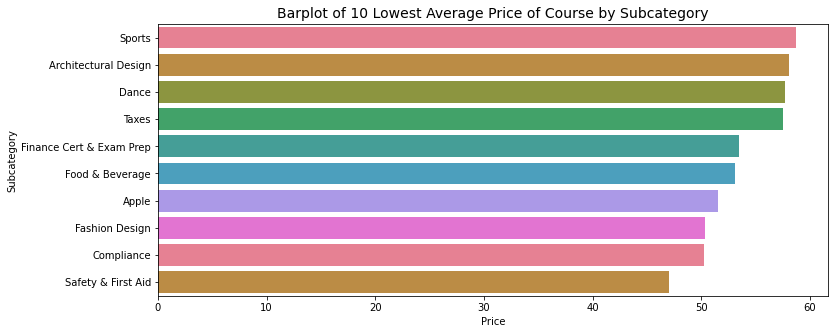

In [53]:
# Selecting lowest 10 courses
lowest_meanPrice_subcategory = meanPrice_subcategory[-10:]

# Bar Plot of 10 lowest prices of each category
plt.figure(figsize=(12,5))
palette = sns.color_palette("husl", 8)
sns.barplot(data=lowest_meanPrice_subcategory, x="Price", y="Subcategory", orient="h", palette=palette)
plt.title("Barplot of 10 Lowest Average Price of Course by Subcategory", fontsize = 14)
plt.show()

The subcategory with the highest mean price is Data Science, while the subcategory with the lowest mean price is Safety & First Aid. 

Data science is a very popular area of study with the increase in real world application. Furthermore it is a relatively technical area of study hence it is unsurprising that it would have the highest average prices. 

On the other hand, it is a bit shocking to see Safety & First Aid to have the lowest average price. Safety and first aid are all vital, useful skills that we need in our daily lives. However on second thought, this could be because most safety and first aid courses are usually conducted in person because of the practical component (e.g. CPR) hence this subcategory of courses might not be as popular online. 

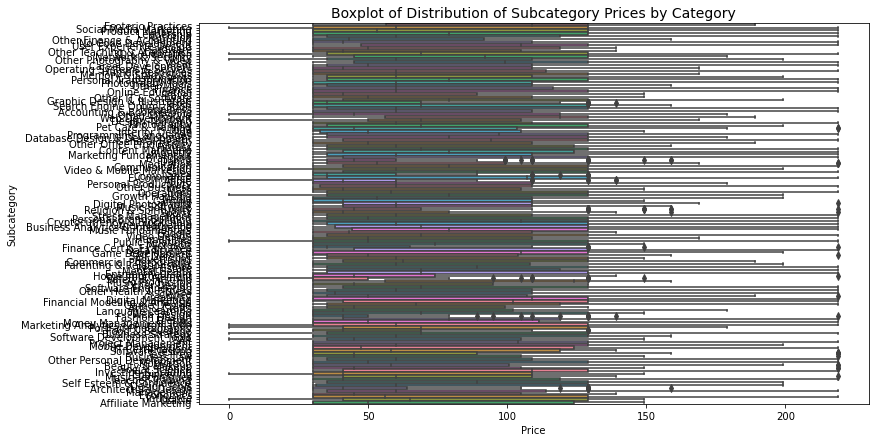

In [55]:
# Spread of category
plt.figure(figsize=(12,7))
palette = sns.color_palette("husl", 8)
sns.boxplot(x="Price", y="Subcategory", data=data_eda, orient="h", palette=palette)
plt.title("Boxplot of Distribution of Subcategory Prices by Category", fontsize=14)
plt.show()

As there are many subcategories, it is difficult to analyze the individual course however from this overview, we can see that the distribution of each subcategory is varying with many different maximum and minimum prices. Futhermore, the overlap between the boxes also differ quite a bit. But from this we can still see that the boxplot is skewed right which shows that there is varying prices for courses but majority of it falls within the more affordable range. 

### (7) Topic VS Price

As there are far too many topics, we will once again narrow in on the 10 highest and 10 lowest average prices.

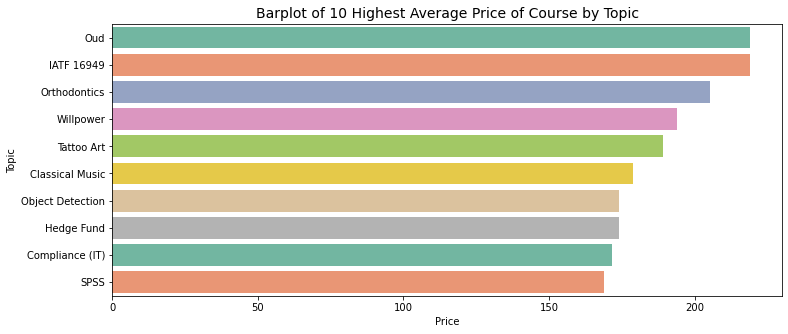

In [57]:
# Calculating mean prices of each category
meanPrice_topic = pd.DataFrame(data_eda.groupby("Topic").mean())
meanPrice_topic["Topic"] = meanPrice_topic.index
meanPrice_topic.sort_values(by="Price", inplace=True, ascending=False)

# Selecting highest 10 courses
highest_meanPrice_topic = meanPrice_topic[0:10]

# Bar Plot of 10 highest prices of each category
plt.figure(figsize=(12,5))
palette = sns.color_palette("Set2")
sns.barplot(data=highest_meanPrice_topic, x="Price", y="Topic", orient="h", palette=palette)
plt.title("Barplot of 10 Highest Average Price of Course by Topic", fontsize = 14)
plt.show()

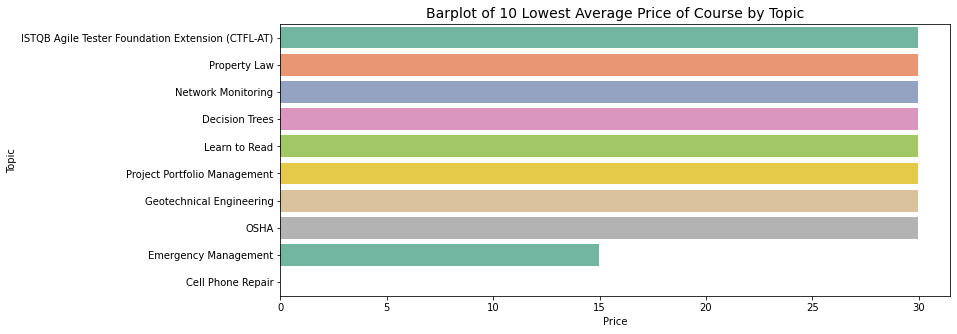

In [58]:
# Selecting lowest 10 courses
lowest_meanPrice_topic = meanPrice_topic[-10:]

# Bar Plot of 10 lowest prices of each category
plt.figure(figsize=(12,5))
palette = sns.color_palette("Set2")
sns.barplot(data=lowest_meanPrice_topic, x="Price", y="Topic", orient="h", palette=palette)
plt.title("Barplot of 10 Lowest Average Price of Course by Topic", fontsize = 14)
plt.show()

Oud is the highest average price course. Oud is a musical instrument, hence culture would also be an expected highly priced course. Conversely, cell phone repair is the topic with the lowest average price. This could be because the course provided in this topic is provided at a free cost. 

### (8) Instructor VS Price 

We'll look at the 10 highest average earning instructors and also investigate whether their ratings play a part in determination of the course price. 

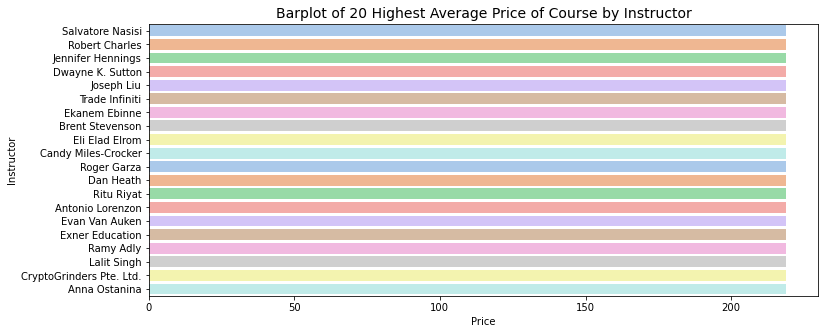

In [72]:
# Obtaining mean price by instructor 
meanPrice_instructor = data_eda.groupby("Instructor").mean()
meanPrice_instructor["Instructor"] = meanPrice_instructor.index
meanPrice_instructor.sort_values(by="Price", ascending=False, inplace=True)

# Selecting highest 20 courses
highest_meanPrice_instructor = meanPrice_instructor[0:20]

# Bar Plot of 10 highest prices of each category
plt.figure(figsize=(12,5))
palette = sns.color_palette("pastel")
sns.barplot(data=highest_meanPrice_instructor, x="Price", y="Instructor", orient="h", palette=palette)
plt.title("Barplot of 20 Highest Average Price of Course by Instructor", fontsize = 14)
plt.show()

It appears that many of the instructors earn the same maximim average course price. We can further investigate the various categories and overall ratings among these top earning instructors.

In [114]:
# Obtain list of instructors all earning the max average course price
max_instructor_price = meanPrice_instructor["Price"].max()
highest_instructors = meanPrice_instructor[meanPrice_instructor["Price"] == max_instructor_price].index

# Extract category for instructors 
highest_instructor_category = []
for instructor in highest_instructor: 
    category = data_eda.loc[data_eda["Instructor"] == instructor, "Category"].tolist()
    highest_instructor_category.extend(category)
    
set(highest_instructor_category)

{'Business',
 'Development',
 'Health & Fitness',
 'Marketing',
 'Music',
 'Personal Development',
 'Photography & Video',
 'Teaching & Academics'}

Therefore instructors earning the highest average course price are generally teaching courses from: 
- Business 
- Development
- Health & Fitness
- Marketing
- Music
- Personal Development
- Photography & Video 
- Teaching & Academics

There seems to be no apparent trend in the type of categories however, this doesn't undermine the significance of these categories. 

### (9) Language VS Price

In [115]:
data_eda["Language"].unique()

array(['English'], dtype=object)

Since all courses are mainly delievered in English, it will not be a useful factor in differentiating the courses and to determine the pricing. 

### (10) SkillsFuture VS Price

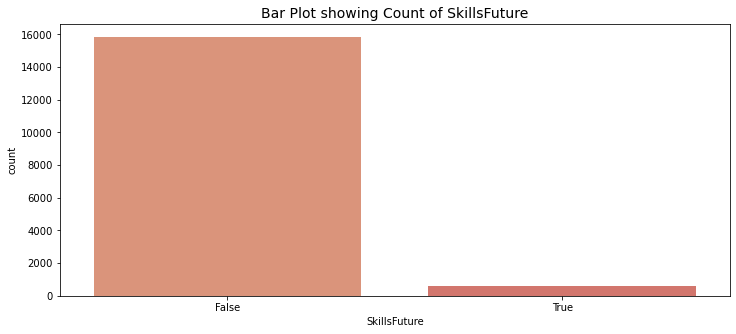

In [124]:
# Bar Plot showing distribution of skillsfuture
plt.figure(figsize=(12,5))
palette = sns.color_palette("flare")
sns.countplot(x="SkillsFuture", data=data_eda, palette=palette)
plt.title("Bar Plot showing Count of SkillsFuture", fontsize=14)
plt.show()

The bar plot tells us that there are far greater number of courses that do not have SkillsFuture credit while fewer of them have the SkillsFuture credit.

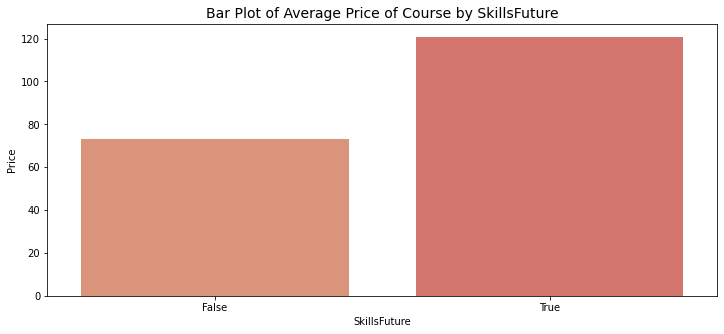

In [127]:
# mean price of course for having or not having SkillsFuture credit
meanPrice_skillsfuture = data_eda.groupby("SkillsFuture").mean()
meanPrice_skillsfuture["SkillsFuture"] = meanPrice_skillsfuture.index

# Barplot to compare pricing between both 
plt.figure(figsize=(12,5))
palette = sns.color_palette("flare")
sns.barplot(x="SkillsFuture", y="Price", data=meanPrice_skillsfuture, palette=palette)
plt.title("Bar Plot of Average Price of Course by SkillsFuture", fontsize=14)
plt.show()

Based on the average price by SkillsFuture, it would appear that courses with SkillsFuture credits are priced higher while those without SkillsFuture credits are priced lower. 

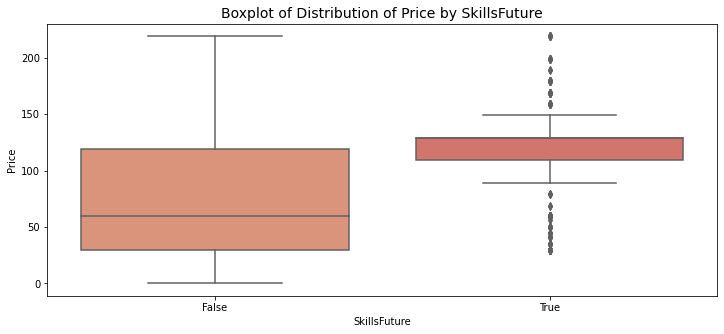

In [128]:
# Boxplot to investigate spread of prices
plt.figure(figsize=(12,5))
palette = sns.color_palette("flare")
sns.boxplot(x="SkillsFuture", y="Price", data=data_eda, palette=palette)
plt.title("Boxplot of Distribution of Price by SkillsFuture", fontsize=14)
plt.show()

From the spread of prices, we can see from the box that courses with SkillsFuture credit is indeed generally higher. However, those courses appear to have many outliers. In comparison, based on the box of courses with no SkillsFuture credit is lower which shows that the bulk of the courses are indeed 